# Market Risk Measurement - Toronto Stock Exchange

## Web Scraping & Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
import yfinance as yf

In [2]:
GSPTSE = yf.download('^GSPTSE', start='2000-01-01', end='2020-12-01')
GSPTSE

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,8271.700195,8305.900391,8157.600098,8202.599609,8202.599609,59509800
2000-01-05,8100.200195,8147.200195,8018.600098,8119.399902,8119.399902,94545700
2000-01-06,8137.000000,8186.399902,8075.700195,8114.200195,8114.200195,79690100
2000-01-07,8193.400391,8430.000000,8193.400391,8429.400391,8429.400391,87693100
2000-01-10,8544.299805,8610.799805,8509.099609,8602.500000,8602.500000,83317000
...,...,...,...,...,...,...
2020-11-24,17203.000000,17311.099609,17190.900391,17274.300781,17274.300781,322087400
2020-11-25,17278.400391,17323.800781,17215.500000,17313.099609,17313.099609,249081100
2020-11-26,17306.199219,17366.599609,17301.900391,17351.300781,17351.300781,98806100


In [3]:
GSPTSE.to_csv('GSPTSE.csv')

In [4]:
data = pd.read_csv('GSPTSE.csv', parse_dates=['Date'], index_col='Date')
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,8271.700195,8305.900391,8157.600098,8202.599609,8202.599609,59509800
2000-01-05,8100.200195,8147.200195,8018.600098,8119.399902,8119.399902,94545700
2000-01-06,8137.000000,8186.399902,8075.700195,8114.200195,8114.200195,79690100
2000-01-07,8193.400391,8430.000000,8193.400391,8429.400391,8429.400391,87693100
2000-01-10,8544.299805,8610.799805,8509.099609,8602.500000,8602.500000,83317000
...,...,...,...,...,...,...
2020-11-24,17203.000000,17311.099609,17190.900391,17274.300781,17274.300781,322087400
2020-11-25,17278.400391,17323.800781,17215.500000,17313.099609,17313.099609,249081100
2020-11-26,17306.199219,17366.599609,17301.900391,17351.300781,17351.300781,98806100


In [5]:
df = data.loc['2006':, 'Close'].to_frame()
df.to_csv('df.csv', index=False)
df

,Close
Date,
2006-01-03,11441.599609
2006-01-04,11501.500000
2006-01-05,11507.700195
2006-01-06,11620.500000
2006-01-09,11565.200195
...,...
2020-11-24,17274.300781
2020-11-25,17313.099609
2020-11-26,17351.300781


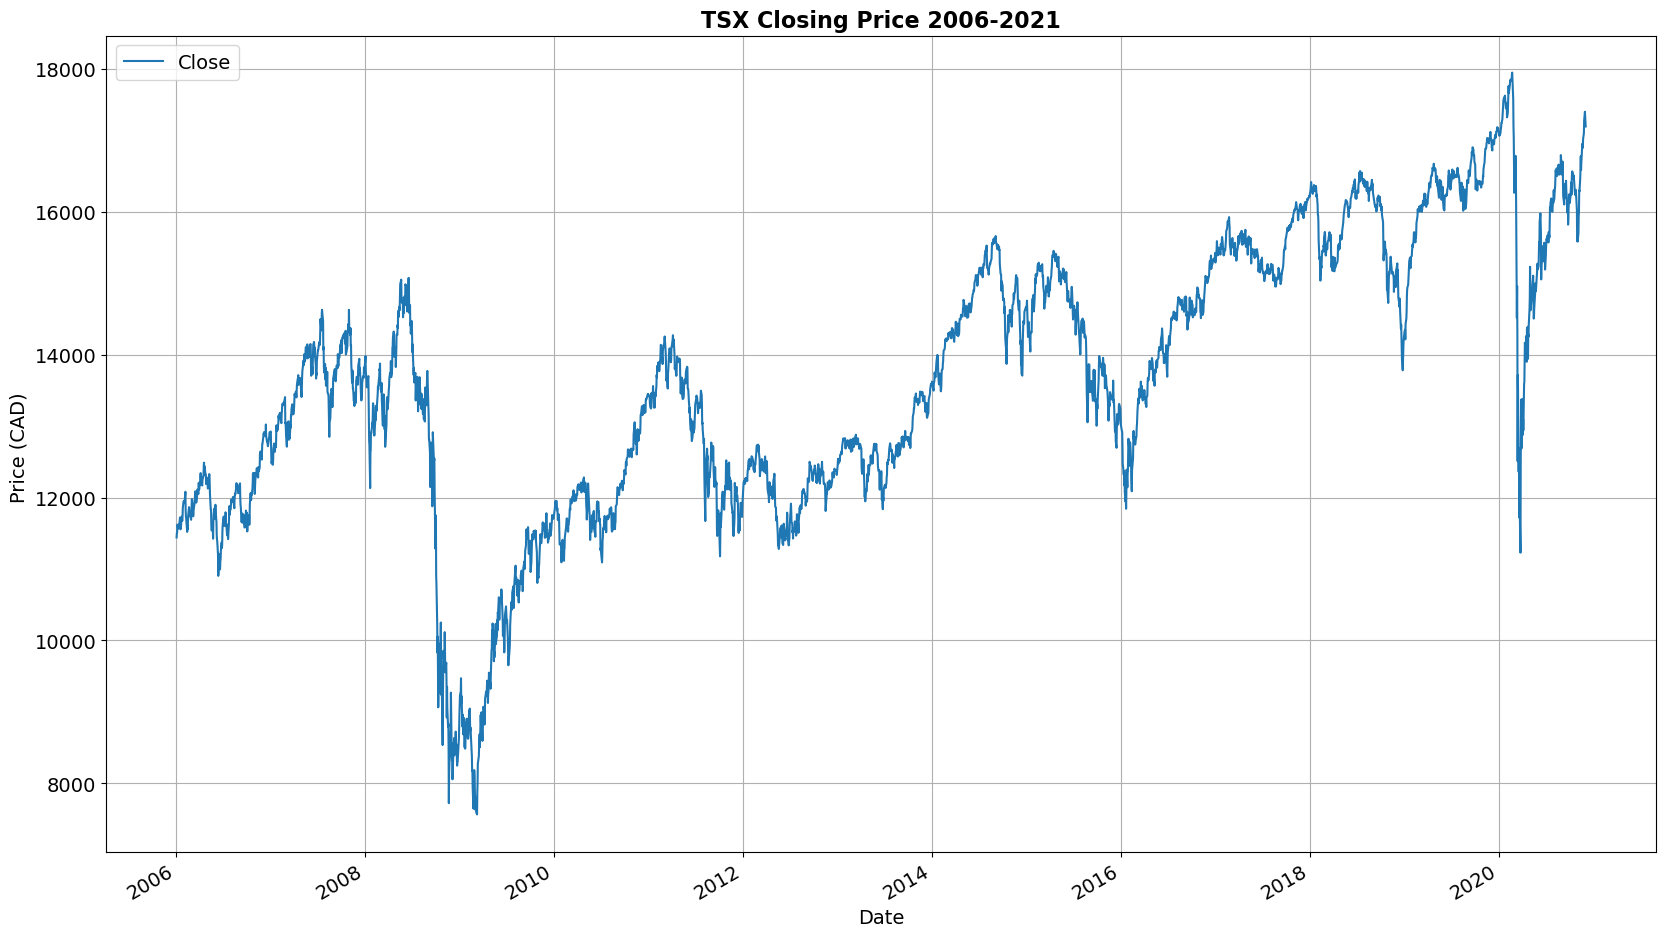

In [6]:
df.plot(figsize=(20,12), fontsize=14)
plt.title('TSX Closing Price 2006-2021', fontdict={'fontweight':'bold', 'fontsize':16}) 
plt.xlabel('Date', size=14)
plt.ylabel('Price (CAD) ', size=14)
plt.legend(fontsize=14, loc=2)
plt.grid(True)

In [7]:
df = pd.read_csv('df.csv')
df['TSX Return'] = df.pct_change()
df.dropna(inplace=True)

In [8]:
returns = df['TSX Return']
returns

1       0.005235
2       0.000539
3       0.009802
4      -0.004759
5       0.002801
          ...   
3740    0.010518
3741    0.002246
3742    0.002206
3743    0.002611
3744   -0.011859
Name: TSX Return, Length: 3744, dtype: float64

In [9]:
returns.describe()

count    3744.000000
mean        0.000177
std         0.011644
min        -0.123447
25%        -0.004073
50%         0.000738
75%         0.005231
max         0.119571
Name: TSX Return, dtype: float64

In [10]:
mu = np.mean(returns)
mu

0.00017695513212442248

In [11]:
sigma = np.std(returns)
sigma

0.011642023308014195

In [12]:
x = np.linspace(-0.12, 0.12, num=1000)
y = stats.norm.pdf(x, loc=mu, scale=sigma)                    

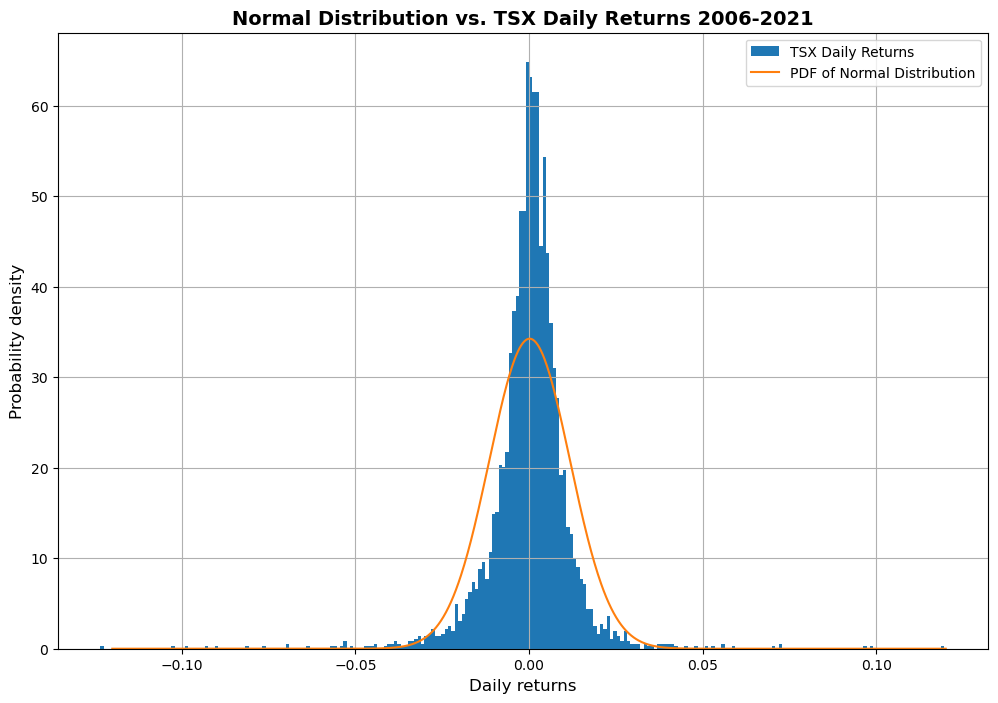

In [13]:
plt.figure(figsize=(12,8))
plt.hist(returns, bins=250, density=True, label='TSX Daily Returns')
plt.plot(x, y, label='PDF of Normal Distribution')
plt.xlabel('Daily returns', fontsize=12)
plt.ylabel('Probability density', fontsize=12)
plt.title('Normal Distribution vs. TSX Daily Returns 2006-2021', fontdict={'fontweight':'bold', 'fontsize':14})
plt.legend(fontsize=10)
plt.grid(True)

In [14]:
stats.skew(returns)

-0.6896463207725343

In [15]:
stats.skewtest(returns)

SkewtestResult(statistic=-15.68547218299696, pvalue=1.9014391212892542e-55)

In [16]:
stats.kurtosis(returns)       # excess kurtosis

18.6307381898321

In [17]:
stats.kurtosistest(returns)

KurtosistestResult(statistic=29.987807124138563, pvalue=1.4152187316793853e-197)

In [18]:
stats.normaltest(returns)

NormaltestResult(statistic=1145.302613718107, pvalue=1.9984688182365528e-249)

## Jarque-Bera and Shapiro-Wilk Tests for Normality

In [19]:
stats.jarque_bera(returns)

SignificanceResult(statistic=54445.06917549784, pvalue=0.0)

In [20]:
stats.shapiro(returns)

ShapiroResult(statistic=0.835148811340332, pvalue=0.0)

## Value at Risk (VaR) - Historical Method

### 1-day VaR of CAD 1 Million 

In [21]:
S0 = 1000000                          # Initial investment             
percs = [0.01, 0.1, 1., 5.0, 10.0]    # percentiles

In [22]:
var_h = stats.scoreatpercentile(returns, percs) * S0
for x, y in zip(percs, var_h):
    print(f'1-day historical VaR of CAD 1 million with {100-x}% confidence = CAD {-y:.2f}')

1-day historical VaR of CAD 1 million with 99.99% confidence = CAD 115672.71
1-day historical VaR of CAD 1 million with 99.9% confidence = CAD 90976.95
1-day historical VaR of CAD 1 million with 99.0% confidence = CAD 33817.12
1-day historical VaR of CAD 1 million with 95.0% confidence = CAD 16984.10
1-day historical VaR of CAD 1 million with 90.0% confidence = CAD 10891.33


In [23]:
def var_historical(returns, perc=1):
    return -np.percentile(returns, perc) * S0    

In [24]:
var_historical(returns, percs)

array([115672.71310678,  90976.94640811,  33817.11914028,  16984.09660096,
        10891.32791104])

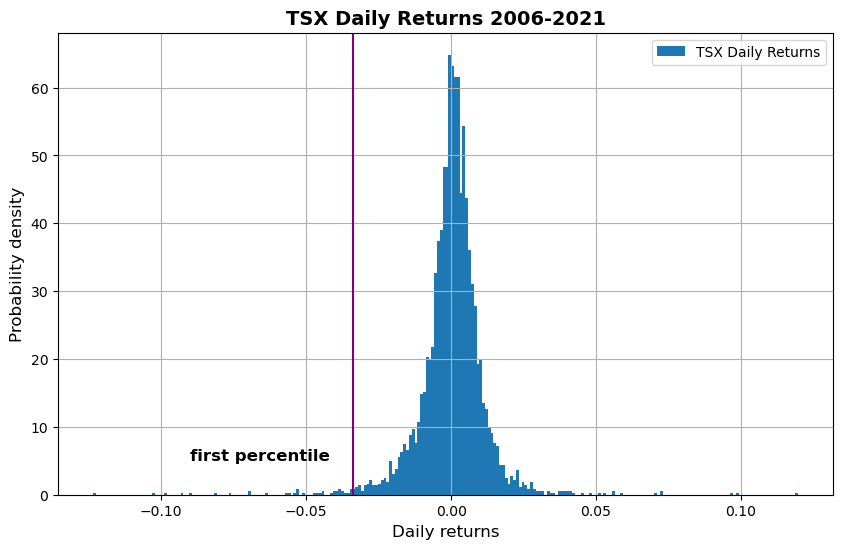

In [25]:
plt.figure(figsize=(10,6))
plt.hist(returns, bins=250, density=True, label='TSX Daily Returns')
plt.axvline(var_h[2]/S0, color='purple')
plt.xlabel('Daily returns', fontsize=12)
plt.ylabel('Probability density', fontsize=12)
plt.text(-0.09, 5, 'first percentile', fontdict={'fontweight':'bold', 'fontsize':12})
plt.title('TSX Daily Returns 2006-2021', fontdict={'fontweight':'bold', 'fontsize':14})
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

## Gaussian VaR and Cornish-Fisher Modification

In [26]:
stats.kurtosis(returns)   # excess kurtosis

18.6307381898321

In [27]:
def var_gaussian(r, perc, modified=False):
    """
    Calculates Parametric VaR of a Series or DataFrame.
    If "modified" is True, then the Semi-Parametric VaR is returned,
    using the Cornish-Fisher expansion
    """
    # Calculate the Z-score assuming returns were normally distributed
    z = norm.ppf(perc/100)
    if modified:
      # Modify the Z-score based on observed skewness and kurtosis of returns 
        s =  stats.skew(r)                                            
        k =  stats.kurtosis(r)                                                             
        z = (z + (z**2 - 1)*s/6 + (z**3 - 3*z)*k/24 - (2*z**3 - 5*z)*(s**2)/36)    # Cornish-Fisher Expansion     
    return -(r.mean() + r.std(ddof=0)*z) * S0

In [28]:
percs

[0.01, 0.1, 1.0, 5.0, 10.0]

In [29]:
percs = np.array(percs)

In [30]:
var_ga = var_gaussian(returns, percs)
var_ga

array([43119.92147444, 35799.60140346, 26906.44104001, 18972.46913112,
       14742.89806437])

In [31]:
for x, y in zip(percs, var_ga):
    print(f'1-day Gaussian VaR of CAD 1 million with {100-x}% confidence = CAD {y:.2f}')

1-day Gaussian VaR of CAD 1 million with 99.99% confidence = CAD 43119.92
1-day Gaussian VaR of CAD 1 million with 99.9% confidence = CAD 35799.60
1-day Gaussian VaR of CAD 1 million with 99.0% confidence = CAD 26906.44
1-day Gaussian VaR of CAD 1 million with 95.0% confidence = CAD 18972.47
1-day Gaussian VaR of CAD 1 million with 90.0% confidence = CAD 14742.90


In [32]:
var_cf = var_gaussian(returns, percs, modified=True)
var_cf

array([4.11365190e+05, 2.23453645e+05, 8.14348258e+04, 1.67735409e+04,
       2.16574441e+02])

In [33]:
for x, y in zip(percs, var_cf):
    print(f'1-day Cornish-Fisher VaR of CAD 1 million with {100-x}% confidence = CAD {y:.2f}')

1-day Cornish-Fisher VaR of CAD 1 million with 99.99% confidence = CAD 411365.19
1-day Cornish-Fisher VaR of CAD 1 million with 99.9% confidence = CAD 223453.65
1-day Cornish-Fisher VaR of CAD 1 million with 99.0% confidence = CAD 81434.83
1-day Cornish-Fisher VaR of CAD 1 million with 95.0% confidence = CAD 16773.54
1-day Cornish-Fisher VaR of CAD 1 million with 90.0% confidence = CAD 216.57


In [34]:
var_list = [pd.Series(var_historical(returns, percs)), pd.Series(var_gaussian(returns, percs)), pd.Series(var_gaussian(returns, percs, modified=True))]
comparison = pd.concat(var_list, axis=1)
comparison.index=pd.Series(percs)
comparison.columns=['Historical', 'Gaussian', 'Cornish-Fisher']
comparison

,Historical,Gaussian,Cornish-Fisher
0.01,115672.713107,43119.921474,411365.190155
0.10,90976.946408,35799.601403,223453.645003
1.00,33817.119140,26906.441040,81434.825780
5.00,16984.096601,18972.469131,16773.540876
10.00,10891.327911,14742.898064,216.574441


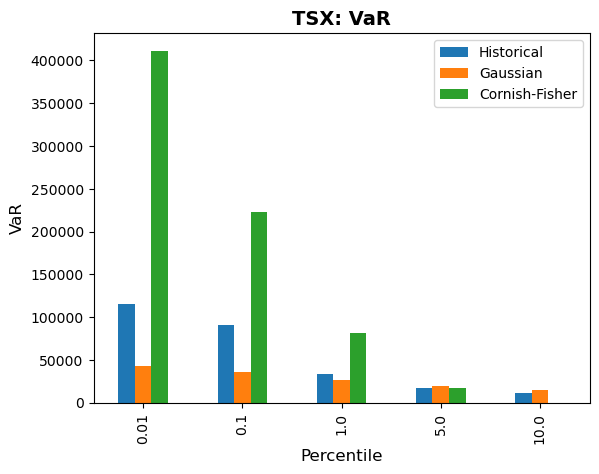

In [35]:
comparison.plot(kind='bar')
plt.title('TSX: VaR', fontdict = {'fontweight':'bold', 'fontsize':14})
plt.xlabel('Percentile', fontsize=12)
plt.ylabel('VaR', fontsize=12);

## Monte Carlo Simulation - Bootstrapping Method 

In [36]:
S0 = 1000000
days = 63

In [37]:
def path_simul_bootstrap(daily_returns, S0, days, sims=10000):               

    np.random.seed(0)
    days = int(days)
    ret = np.random.choice(returns, size=sims*days, replace=True).reshape(sims, days)
    
    paths = (1 + ret).cumprod(axis=1) * S0
    paths = np.hstack((np.ones((sims,1))*S0, paths))
    
    return paths

In [38]:
paths = path_simul_bootstrap(returns, S0=S0, days=days)
paths

array([[1000000.        , 1002556.32915086, 1009979.00348739, ...,
        1033647.08986626, 1033811.17124823, 1038349.91406078],
       [1000000.        , 1033865.90995974, 1036414.31790443, ...,
        1199515.80334247, 1202389.15178141, 1198199.76730379],
       [1000000.        ,  999165.8332832 ,  999903.64867942, ...,
         975919.04613865,  987917.93992558,  983674.69754794],
       ...,
       [1000000.        , 1011837.89065719, 1032669.07379545, ...,
        1094603.57022389, 1101951.23291981, 1106155.6760689 ],
       [1000000.        , 1001337.13274568, 1001763.93546776, ...,
         938927.9315388 ,  933990.38198052,  937273.81944655],
       [1000000.        , 1002384.24618726, 1018667.50265984, ...,
        1157443.20039491, 1163397.7541382 , 1169383.60042873]])

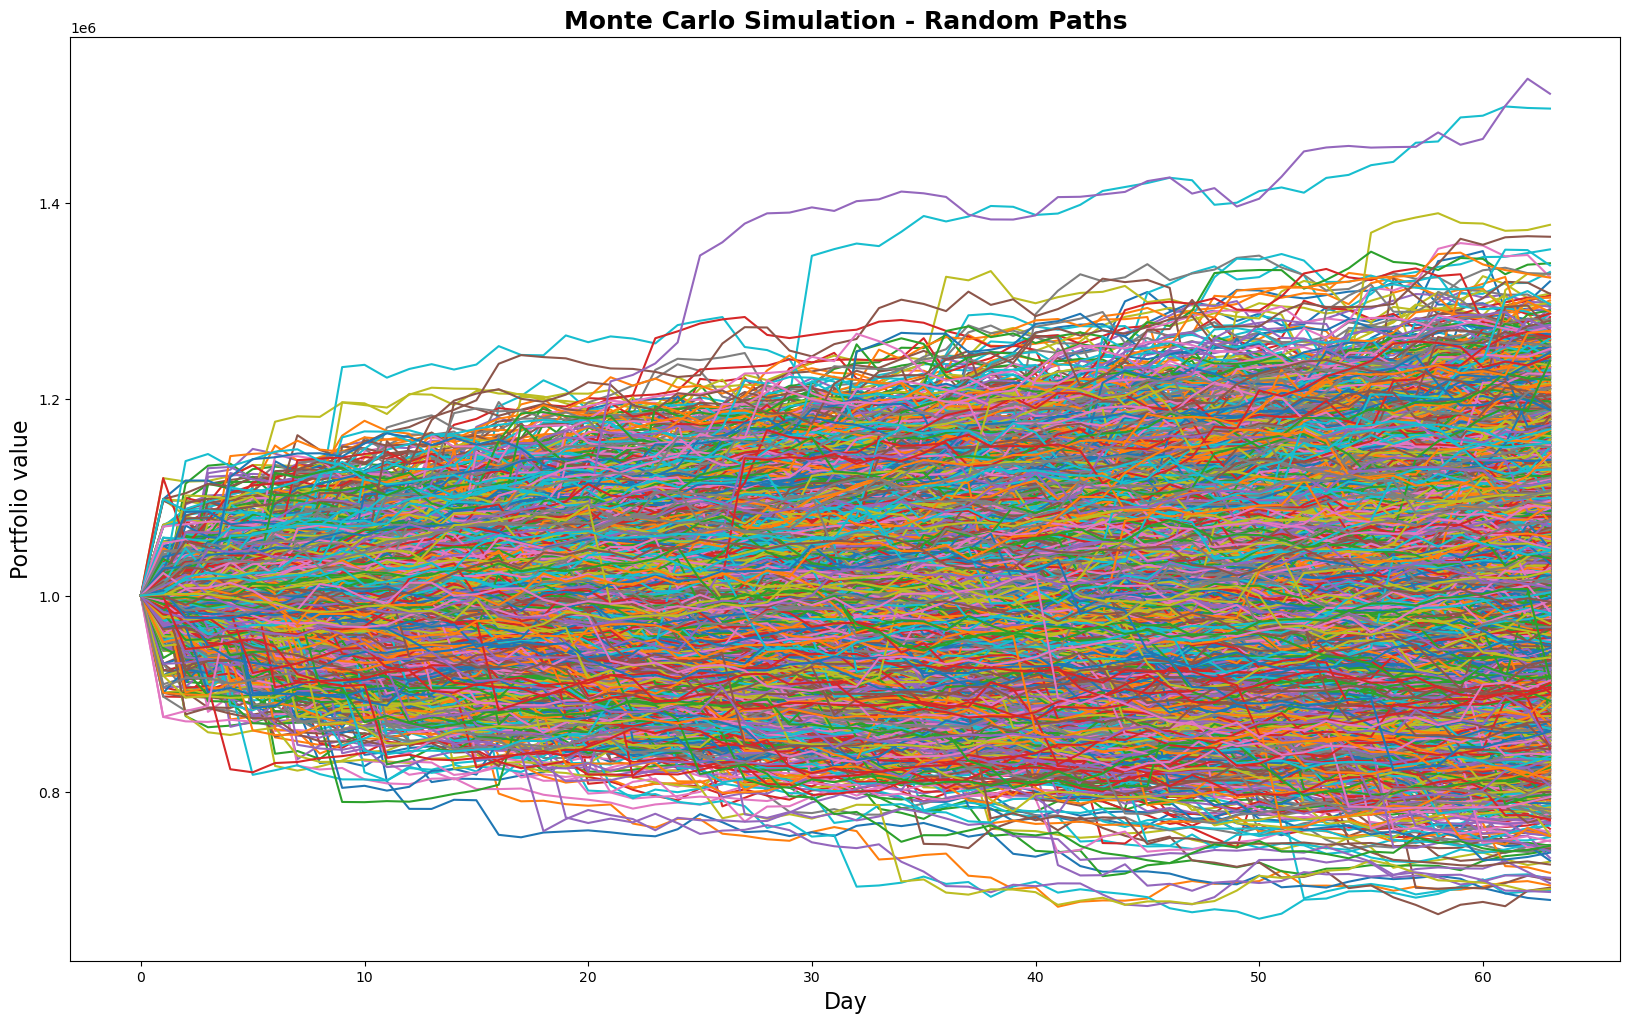

In [39]:
plt.figure(figsize=(20,12))
plt.plot(paths.T)
plt.xlabel('Day', fontsize=16)
plt.ylabel('Portfolio value', fontsize=16)
plt.title('Monte Carlo Simulation - Random Paths', fontdict={'fontweight':'bold', 'fontsize':18})
plt.show()

In [40]:
S0 = 1000000
days = 63
sims = 1000000

In [41]:
paths = path_simul_bootstrap(returns, S0=S0, days=days,  sims=sims)
final_values = paths[:, -1]

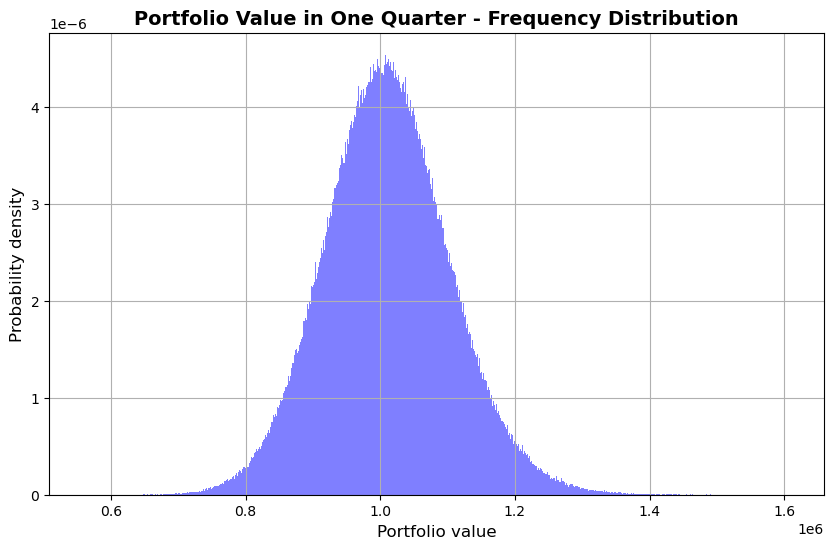

In [42]:
plt.figure(figsize=(10,6))
plt.hist(final_values, bins= 1000, density=True, alpha=0.5, color='b')
plt.xlabel('Portfolio value', fontsize=12)
plt.ylabel('Probability density', fontsize=12)
plt.title('Portfolio Value in One Quarter - Frequency Distribution', fontdict={'fontweight':'bold', 'fontsize':14})
plt.grid(True)

In [43]:
np.mean(final_values)

1011168.6994376575

In [44]:
np.median(final_values)

1008846.3820086619

In [45]:
np.std(final_values)

93572.4708723459

In [46]:
stats.skew(final_values)

0.18342512609115405

In [47]:
final_values

array([1038349.91406078, 1198199.76730379,  983674.69754794, ...,
        918170.29745235, 1077523.16737025, 1159363.81983519])

In [48]:
def var_bootstrap(daily_returns, S0, days, perc, sims=1000000):
    
    np.random.seed(0)
    days = int(days)
    ret = np.random.choice(returns, size=sims*days, replace=True).reshape(sims, days)
    
    final = (1 + ret).prod(axis=1) * S0
    var = stats.scoreatpercentile(final, perc) - S0                  
    
    return var

In [49]:
var_63 = var_bootstrap(returns, S0=1000000, days=63, perc=percs, sims=1000000)
var_63

array([-324672.44654456, -269379.15297502, -200598.52534014,
       -138205.58490714, -105550.88214716])

### 63-day Value-at-Risk (VaR) of CAD 1 Million  

In [50]:
for x, y in zip(percs, var_63):
    print(f'63-day VaR for CAD 1 million with {100-x}% confidence = CAD {-y:.2f}')

63-day VaR for CAD 1 million with 99.99% confidence = CAD 324672.45
63-day VaR for CAD 1 million with 99.9% confidence = CAD 269379.15
63-day VaR for CAD 1 million with 99.0% confidence = CAD 200598.53
63-day VaR for CAD 1 million with 95.0% confidence = CAD 138205.58
63-day VaR for CAD 1 million with 90.0% confidence = CAD 105550.88


In [51]:
var_days = []
for i in range(1, 252+1):
    var_days.append(-var_bootstrap(returns, S0=1000000, days=i, perc=1))        

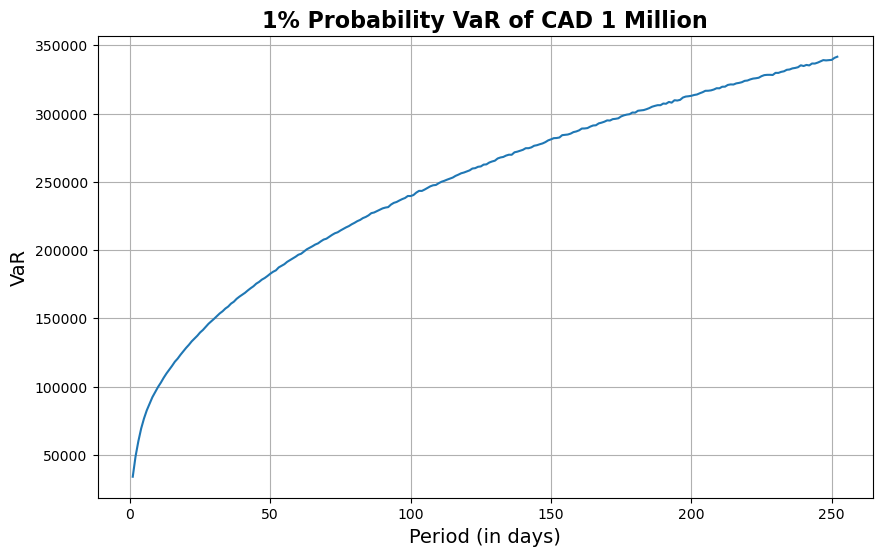

In [52]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 252+1), var_days)
plt.xlabel('Period (in days)', fontsize=14)
plt.ylabel('VaR', fontsize=14)  
plt.title('1% Probability VaR of CAD 1 Million', fontdict={'fontweight':'bold', 'fontsize':16})
plt.grid(True)

In [53]:
var_perc = []
for i in np.linspace(0.1, 5, 100):
    var_perc.append(-var_bootstrap(returns, S0=1000000, days=63, perc=i))

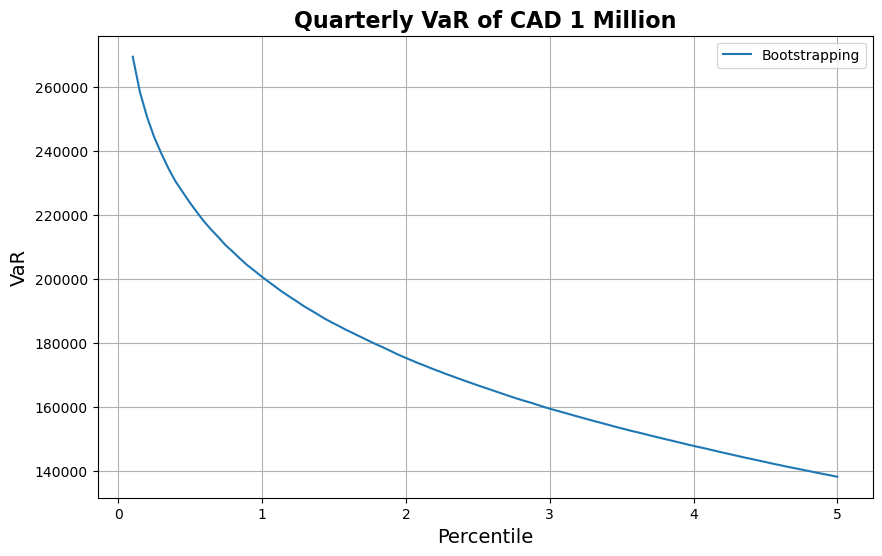

In [54]:
plt.figure(figsize=(10,6))
plt.plot(np.linspace(0.1, 5, 100), var_perc, label='Bootstrapping')
plt.xlabel('Percentile', fontsize=14)
plt.ylabel('VaR', fontsize=14)  
plt.title('Quarterly VaR of CAD 1 Million', fontdict={'fontweight':'bold', 'fontsize':16})
plt.legend(fontsize=10)
plt.grid(True)

## Conditional Value-at-Risk (CVaR)

In [55]:
final_values

array([1038349.91406078, 1198199.76730379,  983674.69754794, ...,
        918170.29745235, 1077523.16737025, 1159363.81983519])

In [56]:
percs

array([ 0.01,  0.1 ,  1.  ,  5.  , 10.  ])

In [57]:
stats.scoreatpercentile(final_values, percs)

array([675327.55345544, 730620.84702498, 799401.47465986, 861794.41509286,
       894449.11785284])

In [58]:
percentile = 1

In [59]:
tail = final_values[final_values < stats.scoreatpercentile(final_values, percentile)]
tail

array([729257.39434385, 705147.70355267, 773246.74915729, ...,
       788494.78264618, 730086.98336239, 763028.53180642])

In [60]:
cvar = tail.mean() - S0
cvar

-231432.12448711589

In [61]:
def cvar_quart(values, percentile):
    tail = values[values < stats.scoreatpercentile(values, percentile)]
    cvar = tail.mean() - S0
    return cvar        

In [62]:
cvar_quart(values = final_values, percentile=1)

-231432.12448711589

In [63]:
cvar = []
for x in percs:
    cvar.append(cvar_quart(values=final_values, percentile=x))

In [64]:
cvar

[-346776.9126759878,
 -294879.1797758691,
 -231432.12448711589,
 -176279.01250802237,
 -148359.43842883722]

### 63-day Conditional Value-at-Risk (CVaR) of CAD 1 Million 

In [65]:
for pair in zip(percs, cvar):
    print(f'63-day CVaR of CAD 1 million with {100-pair[0]}% confidence = CAD {-pair[1]:.2f}')

63-day CVaR of CAD 1 million with 99.99% confidence = CAD 346776.91
63-day CVaR of CAD 1 million with 99.9% confidence = CAD 294879.18
63-day CVaR of CAD 1 million with 99.0% confidence = CAD 231432.12
63-day CVaR of CAD 1 million with 95.0% confidence = CAD 176279.01
63-day CVaR of CAD 1 million with 90.0% confidence = CAD 148359.44
